**DOWNLOADING DATASET**

In [1]:
import kagglehub

# Downloading latest version of kagglehub
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pkm30\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


**IMPORTING REQUISITES**

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input
from xgboost import XGBClassifier
from sklearn.svm import SVC

**#DATA DESCRIPTION**

In [2]:
file_path = r'C:\Users\pkm30\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1\diabetes.csv'
df = pd.read_csv(file_path)

print(df.head())
df.describe()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**#FINDING MISSING VALUES**

In [25]:
zeros_count = (df == 0).sum()

columns_with_zeros = zeros_count[zeros_count > 0]
print("Columns with zeros and their counts:")
print(columns_with_zeros)

Columns with zeros and their counts:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


**#IMPUTATION**

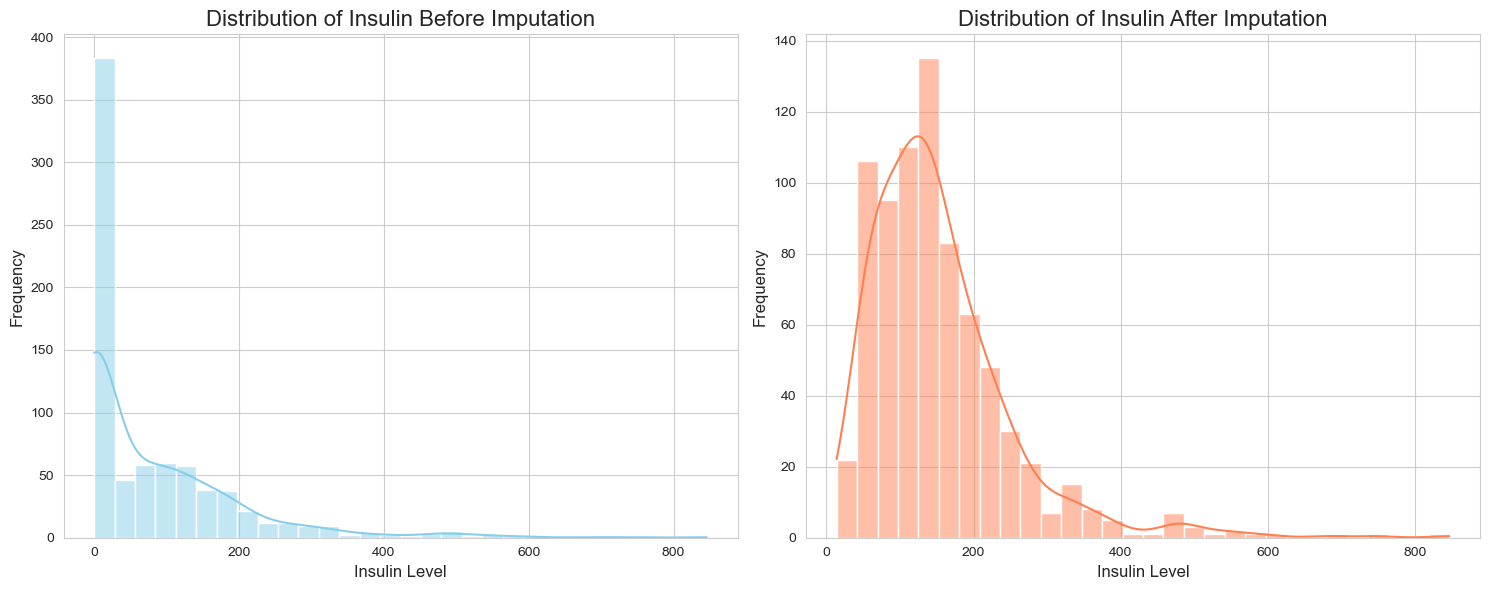

In [24]:
df_original = df

df_imputed = df_original.copy()

cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_imputed[cols_to_impute] = df_imputed[cols_to_impute].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df_imputed.columns)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# histogram for the 'Insulin' before imputation
sns.histplot(df_original['Insulin'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Insulin Before Imputation', fontsize=16)
axes[0].set_xlabel('Insulin Level', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# histogram for the 'Insulin' after imputation
sns.histplot(df_imputed['Insulin'], bins=30, kde=True, ax=axes[1], color='coral')
axes[1].set_title('Distribution of Insulin After Imputation', fontsize=16)
axes[1].set_xlabel('Insulin Level', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()

plt.savefig('insulin_imputation_comparison.png')

In [26]:
df_imputed.to_csv("diabetes_imputed.csv", index=False)

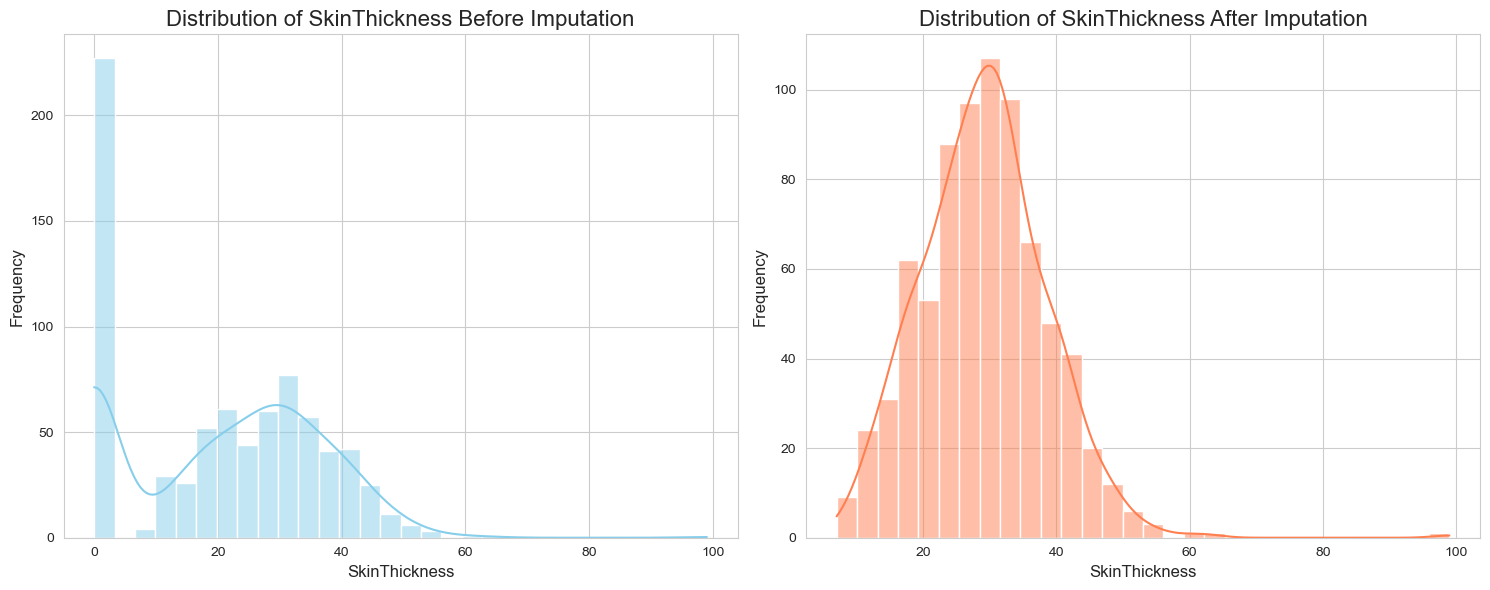

In [10]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# histogram for the 'SkinThickness' before imputation
sns.histplot(df_original['SkinThickness'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of SkinThickness Before Imputation', fontsize=16)
axes[0].set_xlabel('SkinThickness', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# histogram for the 'SkinThickness' after imputation
sns.histplot(df_imputed['SkinThickness'], bins=30, kde=True, ax=axes[1], color='coral')
axes[1].set_title('Distribution of SkinThickness After Imputation', fontsize=16)
axes[1].set_xlabel('SkinThickness', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()

plt.savefig('SkinThickness_imputation_comparison.png')

**# NO IMPUTATION IN PREGNANCIES COLUMN**

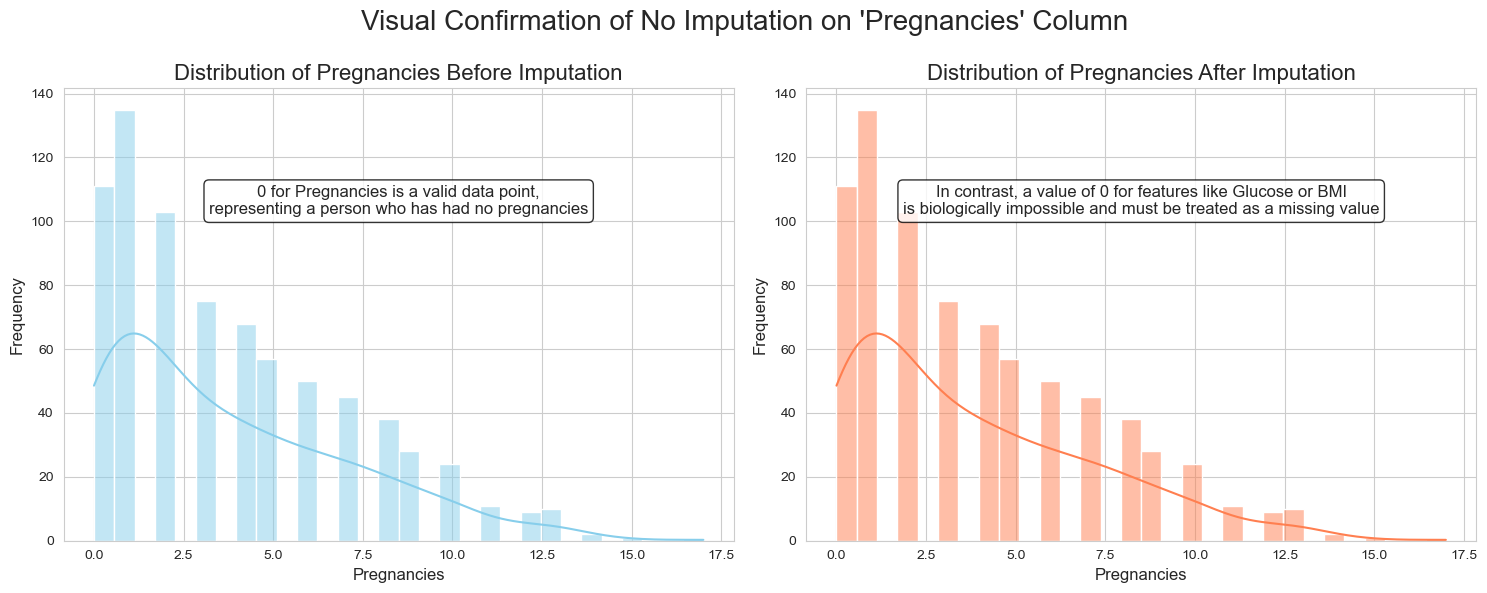

In [26]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# histogram for the 'Pregnancies' before imputation
sns.histplot(df_original['Pregnancies'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Pregnancies Before Imputation', fontsize=16)
axes[0].set_xlabel('Pregnancies', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].text(0.5, 0.75, "0 for Pregnancies is a valid data point,\nrepresenting a person who has had no pregnancies", transform=axes[0].transAxes,
            ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=0.8))

# histogram for the 'Pregnancies' after imputation
sns.histplot(df_imputed['Pregnancies'], bins=30, kde=True, ax=axes[1], color='coral')
axes[1].set_title('Distribution of Pregnancies After Imputation', fontsize=16)
axes[1].set_xlabel('Pregnancies', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].text(0.5, 0.75, "In contrast, a value of 0 for features like Glucose or BMI\nis biologically impossible and must be treated as a missing value", transform=axes[1].transAxes,
            ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=0.8))

plt.tight_layout()
fig.suptitle("Visual Confirmation of No Imputation on 'Pregnancies' Column", fontsize=20)
fig.subplots_adjust(top=0.85)

plt.savefig('Pregnancies_imputation_comparison.png')

**#TRAIN TEST SPLIT**

In [4]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler saved for Streamlit
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)


lr_predictions = lr_model.predict(X_test_scaled)
print("Logistic Regression Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_predictions):.4f}")
lr_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test, lr_proba):.4f}")
print("-" * 30)

# saving Logistic Regression model
joblib.dump(lr_model, 'lr_model.pkl')

Logistic Regression Classifier Performance:
Accuracy: 0.7662
Precision: 0.6863
Recall: 0.6364
F1-Score: 0.6604
ROC-AUC: 0.8202
------------------------------


['lr_model.pkl']

**#Baseline ML Model (Random Forest)**

In [6]:
# loading the saved scaler and transform the data
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [7]:
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"Precision: {precision_score(y_test, rf_predictions):.4f}")
print(f"Recall: {recall_score(y_test, rf_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_predictions):.4f}")
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test, rf_proba):.4f}")
print("-" * 30)

# Save the Random Forest model
joblib.dump(rf_model, 'rf_model.pkl')

Random Forest Classifier Performance:
Accuracy: 0.7532
Precision: 0.6393
Recall: 0.7091
F1-Score: 0.6724
ROC-AUC: 0.8328
------------------------------


['rf_model.pkl']

**#Deep Learning Model (ANN)**

In [16]:
ann_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=0)
ann_predictions = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [15]:
print("ANN Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, ann_predictions):.4f}")
print(f"Precision: {precision_score(y_test, ann_predictions):.4f}")
print(f"Recall: {recall_score(y_test, ann_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, ann_predictions):.4f}")
ann_proba = ann_model.predict(X_test_scaled)
print(f"ROC-AUC: {roc_auc_score(y_test, ann_proba):.4f}")
print("-" * 30)

ann_model.save('model.keras')

ANN Model Performance:
Accuracy: 0.7143
Precision: 0.5965
Recall: 0.6182
F1-Score: 0.6071
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
ROC-AUC: 0.7644
------------------------------


**#Gradient Boosting Model (XGBoost)**

In [20]:
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(random_state=42) # Removed the deprecated parameters
xgb_model.fit(X_train_scaled, y_train)

xgb_predictions = xgb_model.predict(X_test_scaled)
print("XGBoost Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions):.4f}")
print(f"Precision: {precision_score(y_test, xgb_predictions):.4f}")
print(f"Recall: {recall_score(y_test, xgb_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, xgb_predictions):.4f}")
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_proba):.4f}")
print("-" * 30)

xgb_model.save_model('xgb_model.json')

XGBoost Classifier Performance:
Accuracy: 0.7143
Precision: 0.5902
Recall: 0.6545
F1-Score: 0.6207
ROC-AUC: 0.7932
------------------------------


**#Support Vector Machine Model**

In [23]:
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
print(f"Precision: {precision_score(y_test, svm_predictions):.4f}")
print(f"Recall: {recall_score(y_test, svm_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, svm_predictions):.4f}")
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test, svm_proba):.4f}")
print("-" * 30)

joblib.dump(svm_model, 'svm_model.pkl')

SVM Classifier Performance:
Accuracy: 0.7597
Precision: 0.6875
Recall: 0.6000
F1-Score: 0.6408
ROC-AUC: 0.8064
------------------------------


['svm_model.pkl']